<a href="https://colab.research.google.com/github/Nagmashaik123/Section203-Group06/blob/main/Vacc_Brands_TM_Monograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing and reading the processed file containing cleaned tweets
import pandas as pd
df=pd.read_csv(r"ProcessedCovidVaccineReact.csv")
df

,TweetDate,TweetText,CleanedTweet,TweetAuthor,TweetLocation,AllHashtags,Country
0,2021-04-02 23:59:56,RT @ichaydon: A year ago I tried the Moderna v...,rt ichaydon year ago tried moderna vaccine see...,realbafomet,United Arab Emirates,['COVIDvaccine'],United Arab Emirates
1,2021-04-02 23:59:53,RT @hotvickkrishna: Why we need Two Doses of m...,rt hotvickkrishna need two doses mrna vaccine ...,EVANtiel,Unknown,"['vaccines', 'COVID19', 'Pfizer', 'moderna', '...",Unknown
2,2021-04-02 23:59:46,RT @StephMillerShow: Stick it in! Moderna Mama...,rt stephmillershow stick moderna mama house ya...,anessia40,Unknown,"['vaccinated', 'VaccinesWork', 'VaccinesSaveLi...",Unknown
3,2021-04-02 23:59:43,RT @hotvickkrishna: Why we need Two Doses of m...,rt hotvickkrishna need two doses mrna vaccine ...,tammeeh,Kota Petir,"['vaccines', 'COVID19', 'Pfizer', 'moderna', '...",Indonesia
4,2021-04-02 23:59:43,RT @ichaydon: A year ago I tried the Moderna v...,rt ichaydon year ago tried moderna vaccine see...,shipshape555,San Diego,['COVIDvaccine'],United States
...,...,...,...,...,...,...,...
206245,2021-03-10 22:35:54,I blasted this in the car as an Army nurse gav...,blasted car army nurse gave covid vaccine toda...,MatthewDWhite2,New Orleans,"['vaccinated', 'vaccine', 'rona', 'Mississippi...",United States
206246,2021-03-10 22:35:48,2nd #Pfizer shot!! I’m vaccinated! Thank you @...,pfizer shot im vaccinated thank vanyharbor gre...,NYMetroVets,Bronx,"['Pfizer', 'Veterans', 'CovidVaccine']",United States
206247,2021-03-10 22:35:09,@Sarahluvshkey77 Tomorrow is two weeks since m...,tomorrow two weeks since second shot appointme...,G8rgrrlCheryl,Western Washington,['vaccinated'],United States
206248,2021-03-10 22:35:00,"#COVID19 vaccines are hard to come by, but the...",vaccines hard come theres new way find shot ch...,medicaldaily,New York,"['COVID19', 'COVID19vaccine', 'vaccineregistra...",United States


In [2]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

In [3]:
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

# Declaring unigram list
unigramsList = []
for sentence in df['CleanedTweet']:
  try:
    # Skipping if any noise data is iterated 
    if pd.isnull(sentence) or float(sentence):
      continue
  except ValueError:
    # adding to unigram list when not float object
      unigramsList.append(word_tokenize(sentence))

unigrams = [unigram for unigram in unigramsList if unigram != []]
unigram_word = list(itertools.chain.from_iterable(unigrams))
# Calculating and displaying the frequency of the unigrams
unigram_words = nltk.FreqDist(unigram_word)


In [14]:

df = pd.DataFrame(list(unigram_words.items()),columns = ['Unigram_Words','Frequency'])
df

,Unigram_Words,Frequency
0,rt,112087
1,ichaydon,4535
2,year,9710
3,ago,6162
4,tried,4618
...,...,...
109832,pascagoula,1
109833,iggypop,2
109834,lustforlife,1
109835,notifier,1


In [15]:
# Analysing the monograms by declaring manually and categorizing them as based on different vaccines
Pfizer_Vaccine =[ 'pfizer', 'pfizervaccine','pfizercovidvaccine'] # Pfizer Vaccine
Moderna_Vaccine =['modernavaccine','teammoderna','modernapfizer','moderna'] # Moderna Vaccine
Johnson_Vaccine = ['johnsonandjohnson'] # johnsonandjohnson Vaccine
Covaxin_Vaccine =['covax','vax'] # Covaxin Vaccine
Covishield_Vaccine =['covishield'] # Covishield Vaccine

Pfizer   = df.loc[df['Unigram_Words'].isin(Pfizer_Vaccine), 'Frequency'].sum()
Moderna  = df.loc[df['Unigram_Words'].isin(Moderna_Vaccine), 'Frequency'].sum()
Johnson  = df.loc[df['Unigram_Words'].isin(Johnson_Vaccine), 'Frequency'].sum()
Covaxin  = df.loc[df['Unigram_Words'].isin(Covaxin_Vaccine), 'Frequency'].sum()
Covishield = df.loc[df['Unigram_Words'].isin(Covishield_Vaccine), 'Frequency'].sum()

# initialize list of lists
Different_Vaccines = [['Pfizer', Pfizer], ['Moderna', Moderna], ['Johnson', Johnson],['Covaxin', Covaxin], ['Covishield',Covishield]]
  
# Create the pandas DataFrame
df = pd.DataFrame(Different_Vaccines, columns = ['Vaccine_Brands', 'Brand_usage_frequency'])
df['Percentage_diff_brands'] = (df['Brand_usage_frequency'] / df['Brand_usage_frequency'].sum()) * 100
percentageOfBrands = df['Percentage_diff_brands'].tolist()
vaccineBrands = df['Vaccine_Brands'].tolist()
# print dataframe.
df

,Vaccine_Brands,Brand_usage_frequency,Percentage_diff_brands
0,Pfizer,11512,41.622677
1,Moderna,13139,47.505243
2,Johnson,579,2.093427
3,Covaxin,1614,5.835563
4,Covishield,814,2.943091


Text(0, 0.5, '% of Brands Usage')

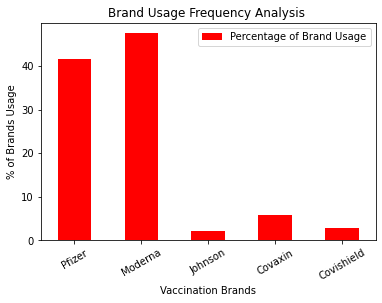

In [16]:
from matplotlib import pyplot as plt

plotdata = pd.DataFrame(
    {"Percentage of Brand Usage": percentageOfBrands}, 
    index= vaccineBrands)
# Plot a bar chart
plotdata.plot(kind="bar", color=['red'])

# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Brand Usage Frequency Analysis ")
plt.xlabel("Vaccination Brands")
plt.ylabel("% of Brands Usage")

